
Student ID-0681817

# Fourier Transform

• What is the noise threshold (i.e. amplitude at 4.5MHz for the clean ﬁrst line)? 

• How many lines in the acquired signal have a noise level higher than the deﬁned threshold?

• Which lines are the ones above the noise threshold? 

• Provide a screen-shot of the code used to determine the total of noisy lines • Provide a screen-shot of the spectrum for the noisy lines.


 The length of the file is: 6930000 as expected from 15000 samples x 462 lines

 The length of the time array is: 15000


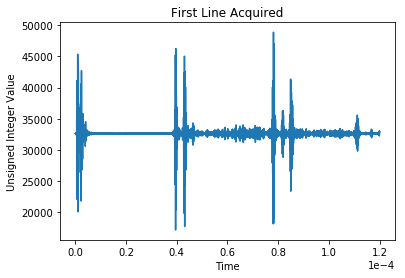

In [1]:
#we have first this command that initialize and matplotlib (library) for plotting and we specify that we want those plots inline in this notebook
%matplotlib inline

#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

#we use a simple open command for the file (basic Python)
f = open('UltrasoundSampleSignal.dat','rb')
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
AllSignal = np.fromfile(f,count=-1,dtype=np.uint16)
#to verify the size of the file I am printing here the lenght of that array 
print('\n The length of the file is: ' + str(len(AllSignal)) + ' as expected from 15000 samples x 462 lines')
#we will now populate an array for the time which we now is 1/125MHz step for a total of 15000
x=np.arange(0,15000/125e6,1/125e6)  #start,stop,step
print('\n The length of the time array is: ' + str(len(x)) )
#now we plot only the first line acquired (15000 samples)
plt.plot(x,AllSignal[:15000])
plt.title('First Line Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
f.close() #close the file

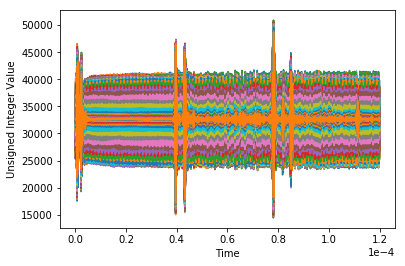

In [2]:
#We continue plotting other lines (we will plot every line and there are 462) 
totlines=np.arange(462)
for index in totlines:
    Signal=AllSignal[index*15000:(index+1)*15000]
    plt.plot(x,AllSignal[index*15000:(index+1)*15000])
    plt.xlabel('Time')
    plt.ylabel('Unsigned Integer Value')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


AllSignal max val: 50892
lineCount:462
lineIndex:0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,2

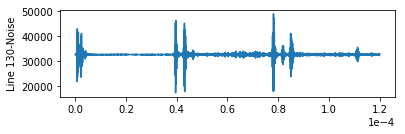

In [3]:
#The first line is clear
FirstLine = AllSignal[:15000] # from 0 to 15000

#But some lines are very noisy, for instance line 172
NoisyLine = AllSignal[172*15000:(172+1)*15000] # 2580000:2595000
#print('Length of AllSignal ', NoisyLine)

# Breaking AllSignal into Signal Lines
# 6930000 values in AllSignal / a single signal line 15000  = 462 Signal Lines
lineIndex = [] #Which lines are the ones above the noise threshold?
lineCount = 0 #How many lines in the acquired signal have a noise level higher than the defined threshold ?
threshold = 43000
AllLines = []

print("AllSignal max val: %d" %np.amax(AllSignal))
#14999
#43000

for indexNumber in range(462):
    line = AllSignal[(indexNumber) * 15000:(indexNumber + 1 ) * 15000] # one single signal line
    #strList = ','.join([str(i) for i in line])
    #print(strList)
    #break    
    #oneSignal = np.array(line, dtype=np.uint16)
    #line = np.fft.fftfreq(oneSignal)
    temp = np.where(line > threshold)[0]
    #print(np.amax(temp))
    if len(temp) > 0: #Line is greater than threshold
        lineCount += 1
        lineIndex.append(indexNumber)
    
strLineIndex = ','.join([str(i) for i in lineIndex])    
print('lineCount:%d' %lineCount)
print('lineIndex:%s' %strLineIndex)

# Now every index in a signal Line
#AllLines = np.array_split(AllSignal, 15000) 
print('Length of all lines %d' %len(AllLines))

plt.subplots_adjust( hspace = .5 )

#160,161,162 index number of the nosiy lines above the threshold
NoisyLine1 = AllSignal[(130) * 15000:(130 + 1 ) * 15000]
plt.subplot(211)
plt.plot(x,NoisyLine1)
plt.ylabel('Line 130-Noise')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

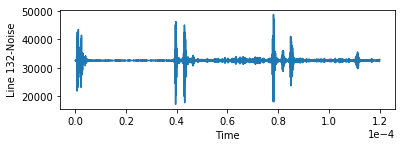

In [4]:
NoisyLine2 = AllSignal[(132) * 15000:(132 + 1 ) * 15000]
plt.subplot(212)
plt.plot(x,NoisyLine2)
plt.xlabel('Time')
plt.ylabel('Line 132-Noise')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

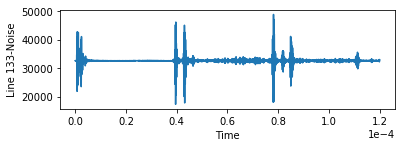

In [5]:
NoisyLine3 = AllSignal[(133) * 15000:(133 + 1 ) * 15000]
plt.subplot(211)
plt.plot(x,NoisyLine3)
plt.xlabel('Time')
plt.ylabel('Line 133-Noise')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# conclusion

-I have settled the threshold at 43000.

-There are three noisy line which are above my threshold i.e. 130, 132 & 133.

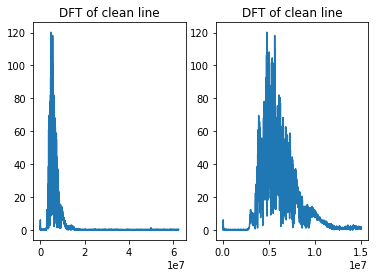

In [6]:
#we first eliminate dc
dataF=FirstLine-np.mean(FirstLine)
L=len(dataF)
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,125e6/2,125e6/15000)
Y=np.fft.fft(dataF)
PyyClean=abs(Y)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
plt.subplot(121)
plt.plot(f, PyyClean[:7500])
plt.title('DFT of clean line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#Zooming into just less than 15MHz
inx=np.where(f>15e6)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], PyyClean[:inx[0]])
plt.title('DFT of clean line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

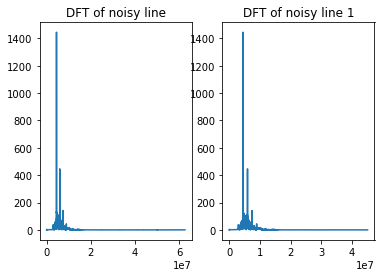

In [7]:
#now we repeat for the noisy line
#we first eliminate dc
dataN=NoisyLine-np.mean(NoisyLine)
L=len(dataN)
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,125e6/2,125e6/15000)
Y=np.fft.fft(dataN)
PyyNoisy=abs(Y)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
plt.subplot(121)
plt.plot(f, PyyNoisy[:7500])
plt.title('DFT of noisy line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#Zooming into just less than 15MHz
inx=np.where(f>45e6)
inx=inx[0]
plt.subplot(122) #So, 211 is equivalent to nrows=2, ncols=1, plot_number=1.
plt.plot(f[:inx[0]], PyyNoisy[:inx[0]])
plt.title('DFT of noisy line 1')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# noise treshold 
 1) this code shows noise treshhold 43000 at 4.5 Mhz and x axis time is 0.4 and 0.8 at noise threshold
2) there are 3 noisy line 130 , 132 and 133 lines are above the noise threshold